# Project 2 - Ames Housing Data and Kaggle Challenge

#### 01_EDA_and_Cleaning

### Imports

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from pandas.api.types import CategoricalDtype 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder, OneHotEncoder

In [21]:
# import data

train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [22]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [23]:
train.shape

(2051, 81)

In [24]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [25]:
test.shape
# missing sale price

(879, 80)

In [26]:
# change columns to lowercase and remove spaces
train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace(' ', '')

test.columns = test.columns.str.lower()
test.columns = test.columns.str.replace(' ', '')

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2051 non-null   int64  
 1   pid            2051 non-null   int64  
 2   mssubclass     2051 non-null   int64  
 3   mszoning       2051 non-null   object 
 4   lotfrontage    1721 non-null   float64
 5   lotarea        2051 non-null   int64  
 6   street         2051 non-null   object 
 7   alley          140 non-null    object 
 8   lotshape       2051 non-null   object 
 9   landcontour    2051 non-null   object 
 10  utilities      2051 non-null   object 
 11  lotconfig      2051 non-null   object 
 12  landslope      2051 non-null   object 
 13  neighborhood   2051 non-null   object 
 14  condition1     2051 non-null   object 
 15  condition2     2051 non-null   object 
 16  bldgtype       2051 non-null   object 
 17  housestyle     2051 non-null   object 
 18  overallq

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             879 non-null    int64  
 1   pid            879 non-null    int64  
 2   mssubclass     879 non-null    int64  
 3   mszoning       879 non-null    object 
 4   lotfrontage    719 non-null    float64
 5   lotarea        879 non-null    int64  
 6   street         879 non-null    object 
 7   alley          58 non-null     object 
 8   lotshape       879 non-null    object 
 9   landcontour    879 non-null    object 
 10  utilities      879 non-null    object 
 11  lotconfig      879 non-null    object 
 12  landslope      879 non-null    object 
 13  neighborhood   879 non-null    object 
 14  condition1     879 non-null    object 
 15  condition2     879 non-null    object 
 16  bldgtype       879 non-null    object 
 17  housestyle     879 non-null    object 
 18  overallqua

### Check null values

In [29]:
def to_ordinal_train_test(x,order):
    train[x].fillna('NA',inplace=True)
    test[x].fillna('NA',inplace=True)
    
    enc = OrdinalEncoder(categories=[order])
    
    enc.fit(train[[x]])
    train[[x]] = enc.transform(train[[x]])
    
    enc.fit(test[[x]])
    test[[x]] = enc.transform(test[[x]])
    
order = ['NA','Po','Fa','TA','Gd','Ex']

In [30]:
def encode_getdummy_train_test(f):
    global train
    global test
    
    # as there are more unique value in test data so create CategoricalDtype to have same no of columns
    u_cat = np.unique((test[f].unique().tolist())+(train[f].unique().tolist())).tolist()
    
    #set categories for equal columns
    train[f] = train[f].astype(CategoricalDtype(u_cat))
    test[f] = test[f].astype(CategoricalDtype(u_cat))
    
    # use .get_dummies() to encode data
    train = pd.concat([train,pd.get_dummies(train[f], prefix=f,dummy_na=False)],axis=1).drop([f],axis=1)
    test = pd.concat([test,pd.get_dummies(test[f], prefix=f,dummy_na=False)],axis=1).drop([f],axis=1)

In [31]:
train.isnull().sum().sort_values(ascending = False)

poolqc           2042
miscfeature      1986
alley            1911
fence            1651
fireplacequ      1000
lotfrontage       330
garagefinish      114
garagecond        114
garagequal        114
garageyrblt       114
garagetype        113
bsmtexposure       58
bsmtfintype2       56
bsmtfintype1       55
bsmtcond           55
bsmtqual           55
masvnrtype         22
masvnrarea         22
bsmthalfbath        2
bsmtfullbath        2
garagecars          1
garagearea          1
bsmtunfsf           1
bsmtfinsf2          1
totalbsmtsf         1
bsmtfinsf1          1
overallcond         0
exterior2nd         0
exterior1st         0
roofmatl            0
roofstyle           0
yearremod/add       0
yearbuilt           0
saleprice           0
overallqual         0
landcontour         0
pid                 0
mssubclass          0
mszoning            0
lotarea             0
street              0
lotshape            0
utilities           0
housestyle          0
lotconfig           0
landslope 

In [32]:
#Check pool QC
print(train['poolqc'].unique())

print(test['poolqc'].unique())

[nan 'Fa' 'Gd' 'Ex' 'TA']
[nan 'Ex' 'TA']


In [33]:
to_ordinal_train_test('poolqc',order)

In [34]:
#Check pool QC to ordinal
print(train['poolqc'].unique())

print(test['poolqc'].unique())

[0. 2. 4. 5. 3.]
[0. 5. 3.]


In [35]:
#Check miscfeature
print(train['miscfeature'].unique())

print(test['miscfeature'].unique())

[nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']
[nan 'Shed' 'Othr' 'Gar2']


In [36]:
#use get dummy for un
encode_getdummy_train_test('miscfeature')

In [37]:
train.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscval,mosold,yrsold,saletype,saleprice,miscfeature_Elev,miscfeature_Gar2,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,miscfeature_nan
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0.0,NaN,0,3,2010,WD,130500,0,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0.0,NaN,0,4,2009,WD,220000,0,0,0,0,0,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0.0,NaN,0,1,2010,WD,109000,0,0,0,0,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0.0,NaN,0,4,2010,WD,174000,0,0,0,0,0,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0.0,NaN,0,3,2010,WD,138500,0,0,0,0,0,0


In [38]:
#Check alley
print(train['alley'].unique())

print(test['alley'].unique())

[nan 'Pave' 'Grvl']
['Grvl' nan 'Pave']


In [39]:
order_alley = ['NA','Grvl','Pave']
to_ordinal_train_test('alley',order_alley)

In [40]:
#Check fence
print(train['fence'].unique())

print(test['fence'].unique())

[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']


In [41]:
train['fence'] = train['fence'].replace(['MnPrv'],'Mn')
train['fence'] = train['fence'].replace(['GdPrv'],'Gd')
train['fence'] = train['fence'].replace(['MnWw'],'Mn')
train['fence'] = train['fence'].replace(['GdWo'],'Gd')


test['fence'] = test['fence'].replace(['MnPrv'],'Mn')
test['fence'] = test['fence'].replace(['GdPrv'],'Gd')
test['fence'] = test['fence'].replace(['MnWw'],'Mn')
test['fence'] = test['fence'].replace(['GdWo'],'Gd')

In [42]:
#Check fence
print(train['fence'].unique())

print(test['fence'].unique())

[nan 'Mn' 'Gd']
[nan 'Mn' 'Gd']


In [43]:
order_fence = ['NA','Mn','Gd']
to_ordinal_train_test('fence',order_fence)

In [44]:
#Check fence
print(train['fence'].unique())

print(test['fence'].unique())

[0. 1. 2.]
[0. 1. 2.]


In [45]:
#Check fireplacequ
print(train['fireplacequ'].unique())

print(test['fireplacequ'].unique())

[nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']
[nan 'Gd' 'Fa' 'TA' 'Po' 'Ex']


In [46]:
to_ordinal_train_test('fireplacequ',order)

In [47]:
#Check fireplacequ
print(train['fireplacequ'].unique())

print(test['fireplacequ'].unique())

[0. 3. 4. 1. 5. 2.]
[0. 4. 2. 3. 1. 5.]


In [48]:
#Check lotfrontage 

In [49]:
train['lotfrontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lotfrontage, dtype: float64

In [50]:
#fill 330 null value in lotfrontage with mean
lotfrontage_values = {'lotfrontage':69.055200}

train.fillna(value=lotfrontage_values, inplace=True)
test.fillna(value=lotfrontage_values, inplace=True)

In [51]:
train['lotfrontage'].describe()

count    2051.000000
mean       69.055200
std        21.306357
min        21.000000
25%        60.000000
50%        69.055200
75%        78.000000
max       313.000000
Name: lotfrontage, dtype: float64

In [52]:
#Check garagefinish
print(train['garagefinish'].unique())

print(test['garagefinish'].unique())

['RFn' 'Unf' 'Fin' nan]
['Unf' 'Fin' 'RFn' nan]


In [53]:
order_garagefinish = ['NA','Unf','RFn','Fin']
to_ordinal_train_test('garagefinish',order_garagefinish)

In [54]:
#Check garagefinish
print(train['garagefinish'].unique())

print(test['garagefinish'].unique())

[2. 1. 3. 0.]
[1. 3. 2. 0.]


In [55]:
#Check garagecond
print(train['garagecond'].unique())

print(test['garagecond'].unique())

['TA' 'Fa' nan 'Po' 'Gd' 'Ex']
['Po' 'TA' nan 'Fa' 'Gd' 'Ex']


In [56]:
to_ordinal_train_test('garagecond',order)

In [57]:
#Check garagecond
print(train['garagecond'].unique())

print(test['garagecond'].unique())

[3. 2. 0. 1. 4. 5.]
[1. 3. 0. 2. 4. 5.]


In [58]:
#Check garagequal
print(train['garagequal'].unique())

print(test['garagequal'].unique())

['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
['Po' 'TA' 'Fa' nan 'Gd']


In [59]:
to_ordinal_train_test('garagequal',order)

In [60]:
#Check garageyrblt
#skip

In [61]:
#Check garagetype
print(train['garagetype'].unique())

print(test['garagetype'].unique())

['Attchd' 'Detchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']
['Detchd' 'Attchd' 'BuiltIn' nan '2Types' 'CarPort' 'Basment']


In [62]:
encode_getdummy_train_test('garagetype')

In [63]:
#Check bsmtexposure
print(train['bsmtexposure'].unique())

print(test['bsmtexposure'].unique())

['No' 'Gd' 'Av' nan 'Mn']
['No' 'Av' nan 'Mn' 'Gd']


In [64]:
order_bsmtexposure = ['NA','No','Mn','Av','Gd']
to_ordinal_train_test('bsmtexposure',order_bsmtexposure)

In [65]:
#Check bsmtfintype2
print(train['bsmtfintype2'].unique())

print(test['bsmtfintype2'].unique())

['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']
['Unf' 'LwQ' nan 'ALQ' 'GLQ' 'Rec' 'BLQ']


In [66]:
order_bsmtfintype2 = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
to_ordinal_train_test('bsmtfintype2',order_bsmtfintype2)

In [67]:
#Check bsmtfintype1
print(train['bsmtfintype1'].unique())

print(test['bsmtfintype1'].unique())

['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']
['Unf' 'GLQ' 'BLQ' 'Rec' 'ALQ' nan 'LwQ']


In [68]:
order_bsmtfintype1 = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
to_ordinal_train_test('bsmtfintype1',order_bsmtfintype1)

In [69]:
#Check bsmtcond
print(train['bsmtcond'].unique())

print(test['bsmtcond'].unique())

['TA' 'Gd' nan 'Fa' 'Po' 'Ex']
['TA' 'Gd' nan 'Fa']


In [70]:
to_ordinal_train_test('bsmtcond',order)

In [71]:
#Check bsmtqual
print(train['bsmtqual'].unique())

print(test['bsmtqual'].unique())

['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
['Fa' 'Gd' 'TA' 'Ex' nan 'Po']


In [72]:
to_ordinal_train_test('bsmtqual',order)

In [73]:
#Check masvnrtype
print(train['masvnrtype'].unique())

print(test['masvnrtype'].unique())

['BrkFace' 'None' nan 'Stone' 'BrkCmn']
['None' 'BrkFace' 'Stone' 'BrkCmn' 'CBlock' nan]


In [74]:
encode_getdummy_train_test('masvnrtype')

In [75]:
#fill 22 null value in masvnrarea with 0
masvnrarea_values = {'masvnrarea':0}

train.fillna(value=masvnrarea_values, inplace=True)
test.fillna(value=masvnrarea_values, inplace=True)

In [76]:
#Check bsmthalfbath
print(train['bsmthalfbath'].unique())

print(test['bsmthalfbath'].unique())

[ 0.  1. nan  2.]
[0 1]


In [77]:
train[train['bsmthalfbath'].isnull()]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscval,mosold,yrsold,saletype,saleprice,miscfeature_Elev,miscfeature_Gar2,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,miscfeature_nan,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_nan,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_CBlock,masvnrtype_None,masvnrtype_Stone,masvnrtype_nan
616,1498,908154080,20,RL,123.0,47007,Pave,0.0,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,0.0,TA,TA,Slab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,4.0,1959.0,1.0,2.0,624.0,3.0,3.0,Y,0,372,0,0,0,0,0.0,0.0,0,7,2008,WD,284700,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1327,1342,903230120,20,RM,99.0,5940,Pave,0.0,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,0.0,TA,TA,PConc,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,0.0,1946.0,1.0,1.0,280.0,3.0,3.0,Y,0,0,0,0,0,0,0.0,1.0,0,4,2008,ConLD,79000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [78]:
# no basement
#fill 2 null value in bsmthalfbath with 0
bsmthalfbath_values = {'bsmthalfbath':0}

train.fillna(value=bsmthalfbath_values, inplace=True)
test.fillna(value=bsmthalfbath_values, inplace=True)

In [79]:
#Check bsmtfullbath
print(train['bsmtfullbath'].unique())

print(test['bsmtfullbath'].unique())

[ 0.  1.  2. nan  3.]
[0 1 2]


In [80]:
train[train['bsmtfullbath'].isnull()]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscval,mosold,yrsold,saletype,saleprice,miscfeature_Elev,miscfeature_Gar2,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,miscfeature_nan,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_nan,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_CBlock,masvnrtype_None,masvnrtype_Stone,masvnrtype_nan
616,1498,908154080,20,RL,123.0,47007,Pave,0.0,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,0.0,TA,TA,Slab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,0.0,3,1,5,1,Ex,11,Typ,2,4.0,1959.0,1.0,2.0,624.0,3.0,3.0,Y,0,372,0,0,0,0,0.0,0.0,0,7,2008,WD,284700,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1327,1342,903230120,20,RM,99.0,5940,Pave,0.0,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,0.0,TA,TA,PConc,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,0.0,1,0,2,1,TA,4,Typ,0,0.0,1946.0,1.0,1.0,280.0,3.0,3.0,Y,0,0,0,0,0,0,0.0,1.0,0,4,2008,ConLD,79000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [81]:
# no basement
#fill 2 null value in bsmtfullbath with 0
bsmtfullbath_values = {'bsmtfullbath':0}

train.fillna(value=bsmtfullbath_values, inplace=True)
test.fillna(value=bsmtfullbath_values, inplace=True)

In [82]:
#Check garagearea
print(train['garagearea'].describe())
print(test['garagearea'].describe())

count    2050.000000
mean      473.671707
std       215.934561
min         0.000000
25%       319.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: garagearea, dtype: float64
count     879.000000
mean      470.832765
std       213.070155
min         0.000000
25%       323.000000
50%       473.000000
75%       576.000000
max      1488.000000
Name: garagearea, dtype: float64


In [83]:
train[train['garagearea'].isnull()]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscval,mosold,yrsold,saletype,saleprice,miscfeature_Elev,miscfeature_Gar2,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,miscfeature_nan,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_nan,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_CBlock,masvnrtype_None,masvnrtype_Stone,masvnrtype_nan
1712,2237,910201180,70,RM,50.0,9060,Pave,0.0,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,0.0,TA,TA,BrkTil,4.0,3.0,1.0,5.0,548.0,1.0,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,Y,174,0,212,0,0,0,0.0,1.0,0,3,2007,WD,150909,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [84]:
# no garage
#fill 1 null value in garagearea, garagecars with 0
garagearea_values = {'garagearea':0,'garagecars':0}

train.fillna(value=garagearea_values, inplace=True)
test.fillna(value=garagearea_values, inplace=True)

In [85]:
train[train['totalbsmtsf'].isnull()]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscval,mosold,yrsold,saletype,saleprice,miscfeature_Elev,miscfeature_Gar2,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,miscfeature_nan,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_nan,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_CBlock,masvnrtype_None,masvnrtype_Stone,masvnrtype_nan
1327,1342,903230120,20,RM,99.0,5940,Pave,0.0,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,0.0,TA,TA,PConc,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,0.0,0.0,1,0,2,1,TA,4,Typ,0,0.0,1946.0,1.0,1.0,280.0,3.0,3.0,Y,0,0,0,0,0,0,0.0,1.0,0,4,2008,ConLD,79000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [86]:
# no basement
#fill 1 null value in bsmtunfsf,bsmtfinsf2,bsmtfinsf1 with 0
bsmtunfsf_values = {'bsmtunfsf':0,'bsmtfinsf2':0,'bsmtfinsf1':0,'totalbsmtsf':0}

train.fillna(value=bsmtunfsf_values, inplace=True)
test.fillna(value=bsmtunfsf_values, inplace=True)

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 97 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2051 non-null   int64  
 1   pid                 2051 non-null   int64  
 2   mssubclass          2051 non-null   int64  
 3   mszoning            2051 non-null   object 
 4   lotfrontage         2051 non-null   float64
 5   lotarea             2051 non-null   int64  
 6   street              2051 non-null   object 
 7   alley               2051 non-null   float64
 8   lotshape            2051 non-null   object 
 9   landcontour         2051 non-null   object 
 10  utilities           2051 non-null   object 
 11  lotconfig           2051 non-null   object 
 12  landslope           2051 non-null   object 
 13  neighborhood        2051 non-null   object 
 14  condition1          2051 non-null   object 
 15  condition2          2051 non-null   object 
 16  bldgty

In [88]:
encode_getdummy_train_test('mszoning')

In [89]:
street_order = ['Grvl','Pave']
to_ordinal_train_test('street',street_order)

In [90]:
to_ordinal_train_test('heatingqc',order)

In [91]:
encode_getdummy_train_test('heating')

In [92]:
to_ordinal_train_test('exterqual',order)
to_ordinal_train_test('extercond',order)

In [93]:
train.drop('garageyrblt',axis='columns', inplace=True)
test.drop('garageyrblt',axis='columns', inplace=True)

In [94]:
#Check lotshape
print(train['lotshape'].unique())

print(test['lotshape'].unique())

['IR1' 'Reg' 'IR2' 'IR3']
['Reg' 'IR1' 'IR3' 'IR2']


In [95]:
encode_getdummy_train_test('lotshape')

In [96]:
#Check landcontour
print(train['landcontour'].unique())

print(test['landcontour'].unique())

['Lvl' 'HLS' 'Bnk' 'Low']
['Lvl' 'Bnk' 'Low' 'HLS']


In [97]:
encode_getdummy_train_test('landcontour')

In [98]:
#Check utilities
print(train['utilities'].unique())

print(test['utilities'].unique())

['AllPub' 'NoSeWa' 'NoSewr']
['AllPub' 'NoSewr']


In [99]:
encode_getdummy_train_test('utilities')

In [100]:
#Check lotconfig 
print(train['lotconfig'].unique())

print(test['lotconfig'].unique())

['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
['Inside' 'CulDSac' 'Corner' 'FR2' 'FR3']


In [101]:
encode_getdummy_train_test('lotconfig')

In [102]:
#Check landslope
print(train['landslope'].unique())

print(test['landslope'].unique())

['Gtl' 'Sev' 'Mod']
['Gtl' 'Mod' 'Sev']


In [103]:
order_landslope = ['Sev','Mod','Gtl']
to_ordinal_train_test('landslope',order_landslope)

In [104]:
#Check neighborhood
print(train['neighborhood'].unique())

print(test['neighborhood'].unique())

['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
['OldTown' 'Sawyer' 'Gilbert' 'NAmes' 'MeadowV' 'CollgCr' 'Somerst'
 'Mitchel' 'SawyerW' 'IDOTRR' 'BrkSide' 'Edwards' 'ClearCr' 'NWAmes'
 'Timber' 'NoRidge' 'NridgHt' 'Crawfor' 'StoneBr' 'Veenker' 'BrDale'
 'SWISU' 'Blmngtn' 'NPkVill' 'Greens' 'Blueste']


In [105]:
encode_getdummy_train_test('neighborhood')

In [106]:
#Check condition1
print(train['condition1'].unique())

print(test['condition1'].unique())

['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
['Norm' 'Feedr' 'Artery' 'PosA' 'RRAn' 'PosN' 'RRNn' 'RRAe' 'RRNe']


In [107]:
encode_getdummy_train_test('condition1')

In [108]:
#Check condition2
print(train['condition2'].unique())

print(test['condition2'].unique())

['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
['Norm' 'PosN' 'Feedr' 'PosA']


In [109]:
encode_getdummy_train_test('condition2')

In [110]:
#Check bldgtype 
print(train['bldgtype'].unique())

print(test['bldgtype'].unique())

['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
['2fmCon' 'Duplex' '1Fam' 'TwnhsE' 'Twnhs']


In [111]:
encode_getdummy_train_test('bldgtype')

In [112]:
#Check housestyle
print(train['housestyle'].unique())

print(test['housestyle'].unique())

['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']
['2Story' '1Story' '1.5Fin' 'SLvl' 'SFoyer' '2.5Fin' '2.5Unf' '1.5Unf']


In [113]:
encode_getdummy_train_test('housestyle')

In [114]:
#Check housestyle
print(train['roofstyle'].unique())

print(test['roofstyle'].unique())

['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']
['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']


In [115]:
encode_getdummy_train_test('roofstyle')

In [116]:
def check_unique(x):
    print(train[x].unique())
    print(test[x].unique())

In [117]:
check_unique('roofmatl')

['CompShg' 'WdShngl' 'Tar&Grv' 'WdShake' 'Membran' 'ClyTile']
['CompShg' 'Metal' 'WdShake' 'Tar&Grv' 'WdShngl' 'Roll']


In [118]:
encode_getdummy_train_test('roofmatl')

In [119]:
check_unique('exterior1st')

['HdBoard' 'VinylSd' 'Wd Sdng' 'BrkFace' 'Plywood' 'MetalSd' 'AsbShng'
 'CemntBd' 'WdShing' 'Stucco' 'BrkComm' 'Stone' 'CBlock' 'ImStucc'
 'AsphShn']
['AsbShng' 'Plywood' 'VinylSd' 'Wd Sdng' 'CemntBd' 'MetalSd' 'HdBoard'
 'BrkComm' 'Stucco' 'WdShing' 'BrkFace' 'PreCast' 'AsphShn']


In [120]:
encode_getdummy_train_test('exterior1st')

In [121]:
check_unique('exterior2nd')

['Plywood' 'VinylSd' 'Wd Sdng' 'HdBoard' 'MetalSd' 'AsbShng' 'CmentBd'
 'Wd Shng' 'BrkFace' 'Stucco' 'Brk Cmn' 'ImStucc' 'Stone' 'CBlock'
 'AsphShn']
['AsbShng' 'Plywood' 'VinylSd' 'Wd Sdng' 'CmentBd' 'MetalSd' 'BrkFace'
 'Stucco' 'HdBoard' 'Wd Shng' 'ImStucc' 'Brk Cmn' 'PreCast' 'CBlock'
 'AsphShn' 'Other']


In [122]:
encode_getdummy_train_test('exterior2nd')

In [123]:
check_unique('foundation')

['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']
['Stone' 'CBlock' 'PConc' 'BrkTil' 'Slab' 'Wood']


In [124]:
encode_getdummy_train_test('foundation')

In [125]:
check_unique('centralair')

['Y' 'N']
['N' 'Y']


In [126]:
order_yn = ['N','Y']
to_ordinal_train_test('centralair',order_yn)

In [127]:
check_unique('electrical')

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
['FuseP' 'SBrkr' 'FuseA' 'FuseF' nan]


In [128]:
encode_getdummy_train_test('electrical')

In [129]:
check_unique('kitchenqual')

['Gd' 'TA' 'Fa' 'Ex']
['Fa' 'TA' 'Gd' 'Ex' 'Po']


In [130]:
to_ordinal_train_test('kitchenqual',order)

In [131]:
check_unique('functional')

['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']
['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Maj2']


In [132]:
order_functional = ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ']
to_ordinal_train_test('functional',order_functional)

In [133]:
check_unique('paveddrive')

['Y' 'N' 'P']
['Y' 'N' 'P']


In [134]:
order_paveddrive = ['N','P','Y']
to_ordinal_train_test('paveddrive',order_paveddrive)

In [135]:
check_unique('saletype')

['WD ' 'New' 'COD' 'ConLD' 'Con' 'CWD' 'Oth' 'ConLI' 'ConLw']
['WD ' 'New' 'Con' 'COD' 'VWD' 'CWD' 'ConLD' 'ConLI' 'Oth' 'ConLw']


In [136]:
encode_getdummy_train_test('saletype')

In [137]:
train.shape

(2051, 234)

In [138]:
test.shape

(879, 233)

In [139]:
train.to_csv('../datasets/train_clean.csv', index = False)
test.to_csv('../datasets/test_clean.csv', index = False)

## EDA

In [165]:
train2 = train.copy()
test2 = test.copy()

In [166]:
train2.head()

,id,pid,mssubclass,lotfrontage,lotarea,street,alley,landslope,overallqual,overallcond,yearbuilt,yearremod/add,masvnrarea,exterqual,extercond,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heatingqc,centralair,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscval,mosold,yrsold,saleprice,miscfeature_Elev,miscfeature_Gar2,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,miscfeature_nan,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_nan,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_CBlock,masvnrtype_None,masvnrtype_Stone,masvnrtype_nan,mszoning_A (agr),mszoning_C (all),mszoning_FV,mszoning_I (all),mszoning_RH,mszoning_RL,mszoning_RM,heating_Floor,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,lotshape_IR1,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_Bnk,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_AllPub,utilities_NoSeWa,utilities_NoSewr,lotconfig_Corner,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Artery,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Artery,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Fin,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Flat,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_ClyTile,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsbShng,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_PreCast,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsbShng,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_PreCast,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,electrical_nan,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_VWD,saletype_WD
0,109,533352170,60,69.0552,13517,1.0,0.0,2.0,6,8,1976,2005,289.0,4.0,3.0,3.0,3.0,1.0,6.0,533.0,1.0,0.0,192.0,725.0,5.0,1.0,725,754,0,1479,0.0,0.0,2,1,3,1,4.0,6,7.0,0,0.0,2.0,2.0,475.0,3.0,3.0,2.0,0,44,0,0,0,0,0.0,0.0,0,3,2010,130500,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

<AxesSubplot:xlabel='saleprice', ylabel='Count'>

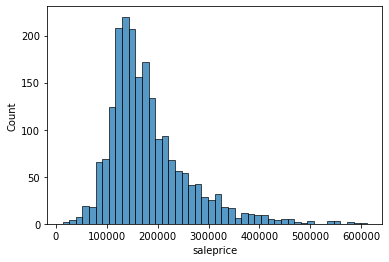

In [167]:
# distribution of sale price
sns.histplot(train['saleprice'])

In [168]:
#cut of outlier saleprice more than 400000
train2 = train2[train2['saleprice'] < 400000]

<AxesSubplot:xlabel='saleprice', ylabel='Count'>

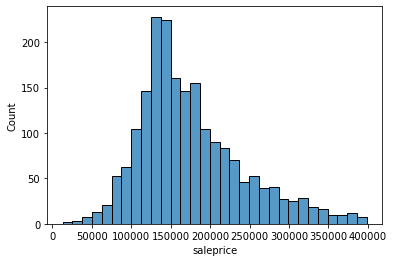

In [169]:
sns.histplot(train2['saleprice'])

<AxesSubplot:xlabel='grlivarea', ylabel='Count'>

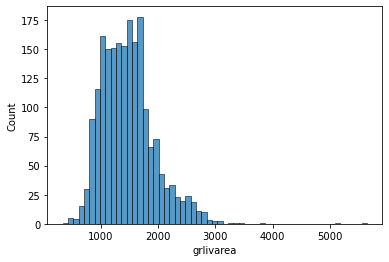

In [170]:
sns.histplot(train2['grlivarea'])

In [171]:
#cut of outlier grlivarea more than 4000
train2 = train2[train2['grlivarea'] < 4000]

<AxesSubplot:xlabel='grlivarea', ylabel='Count'>

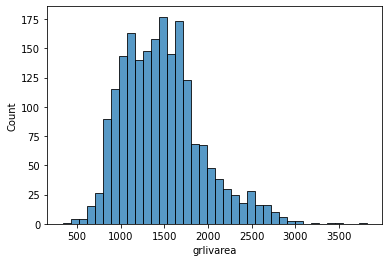

In [172]:
sns.histplot(train2['grlivarea'])

In [173]:
#create house year
train2['houseyear'] = train2['yrsold'] - train2['yearremod/add']
test2['houseyear'] = test2['yrsold'] - test2['yearremod/add']

C:\Users\ACDMY2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='houseyear', ylabel='saleprice'>

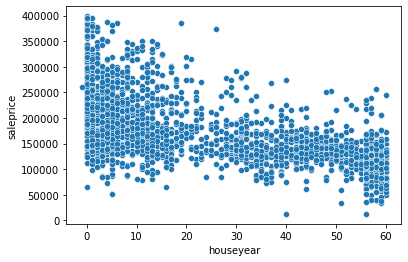

In [174]:
sns.scatterplot(train2['houseyear'],train2['saleprice'] )

In [ ]:
# Less house years can be sold at higher price

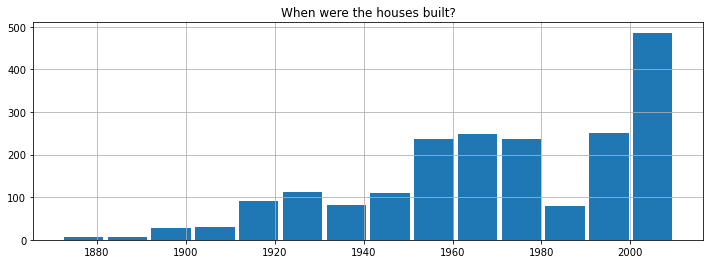

In [175]:
train2['yearbuilt'].hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

In [ ]:
# majority of the house build lately in 

C:\Users\ACDMY2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yearbuilt', ylabel='saleprice'>

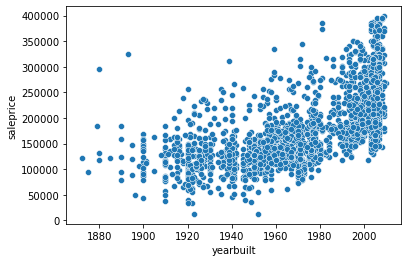

In [176]:
sns.scatterplot(train2['yearbuilt'],train2['saleprice'] )

C:\Users\ACDMY2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yearremod/add', ylabel='saleprice'>

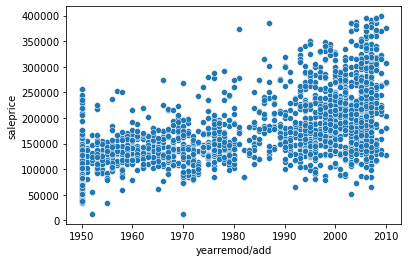

In [177]:
sns.scatterplot(train2['yearremod/add'],train2['saleprice'] )

In [179]:
train2.to_csv('../datasets/train_clean2.csv', index = False)
test2.to_csv('../datasets/test_clean2.csv', index = False)